<a href="https://colab.research.google.com/github/simoneminorr/visualization_assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

In [1]:
! git clone https://github.com/ds3001f25/visualization_assignment.git

Cloning into 'visualization_assignment'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 0), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 1.88 MiB | 14.67 MiB/s, done.


In [8]:
cd visualization_assignment

/content/visualization_assignment


**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

1. The user should pass in a Pandas series or Numpy array.

In [2]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.

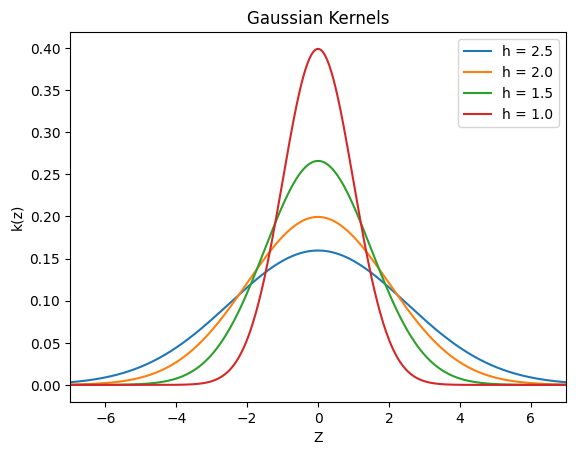

In [3]:
#Gaussian
M = 500 # steps for grid
grid = np.linspace(-7,7,M) # Grid for plotting values

def normal_kernel(center,bandwidth):
    """ Normal kernel function. """
    density = np.exp( -(( (grid-center)/bandwidth)**2)/2 ) / (bandwidth * np.sqrt(2*np.pi))
    return density

## Compute normal kernels around 0 for various bandwidths:
y_10 = normal_kernel(0,1.0)
y_15 = normal_kernel(0,1.5)
y_20 = normal_kernel(0,2.0)
y_25 = normal_kernel(0,2.5)

## Plot kernel functions:
fig = sns.lineplot(x=grid,y=y_25, label='h = 2.5')
fig.set_xlim(-7, 7)
fig.set(title="Gaussian Kernels", xlabel='Z', ylabel='k(z)')
sns.lineplot(x=grid,y=y_20, label='h = 2.0')
sns.lineplot(x=grid,y=y_15, label='h = 1.5')
sns.lineplot(x=grid,y=y_10, label='h = 1.0')
plt.show()

[Text(0.5, 1.0, 'The Bump Function'),
 Text(0.5, 0, 'z'),
 Text(0, 0.5, '$ k(z)$')]

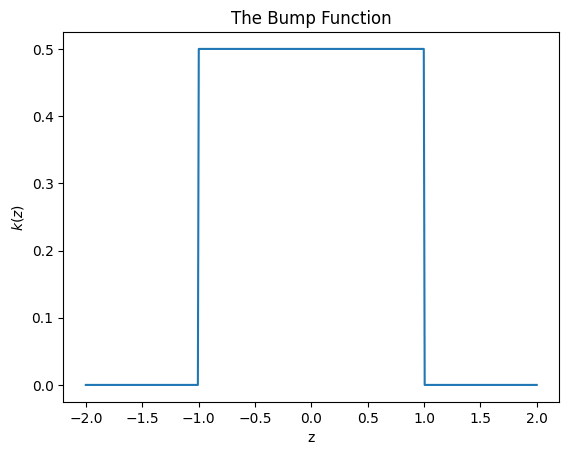

In [4]:
#Epanechnikov
gr = np.linspace(-2,2,M)
kr = (np.abs(gr) <= 1) * .5
fig = sns.lineplot(x=gr,y=kr) # Bump function
fig.set(title="The Bump Function", xlabel='z', ylabel='$ k(z)$')

In [7]:
## Some stats about X:
sd = np.std(x) # standard deviation of x
N = len(x) # number of observations
med_x = np.median(x) # median of x
min_x = min(x) # min of x
max_x = max(x) # max of x

NameError: name 'x' is not defined

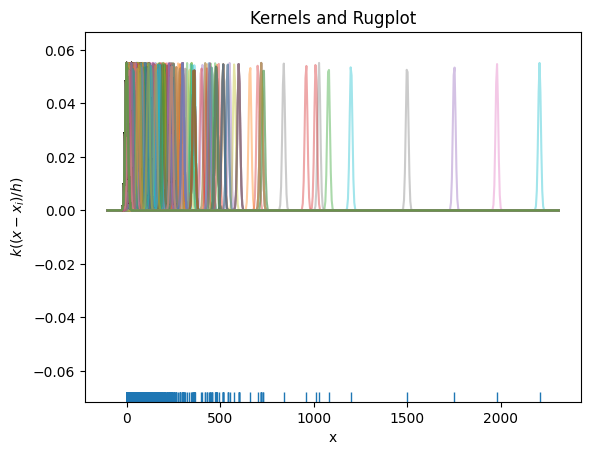

In [10]:
# Load the data and extract the 'Violations' column
pretrial_df = pd.read_csv('/content/visualization_assignment/data/pretrial_data.csv')
x = pretrial_df['sentence'].dropna().values # Use the 'sentence' column and remove NaN values

# Calculate standard deviation, number of observations, and min/max values
sd = np.std(x)
N = len(x)
min_x = np.min(x)
max_x = np.max(x)

h = 1.06 * sd * N**(-1/5) # Silverman's plug-in bandwidth
h_s = h # save the plug-in value for later

M = 500 # steps for grid
grid = np.linspace(min_x-2*sd,max_x+2*sd,M) # X grid, +/2 standard deviations of median

kde = 0*grid
fig = sns.rugplot(x) # Start with a rugplot
fig.set(title="Kernels and Rugplot", xlabel='x', ylabel='$k( (x-x_i)/h )$')
for i in range( len(x) ): # For each data point...
    density = normal_kernel(x[i],h) # Compute the kernel function for this data point
    sns.lineplot(x=grid,y=density, alpha = .4) # Plot the kernel
    kde += density # Add this density to the overall KDE
kde = kde/N
plt.show()

In [6]:
#seaborn
fig = sns.lineplot(x=grid,y=kde) # Our KDE estimator
fig.set(title="Our Kernel Density Plot", xlabel='x', ylabel='$\\hat{f}(x)$')

NameError: name 'kde' is not defined

**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?